# Lab03 - Filtering and Gradients / Edges
### TDS3651 Visual Information Processing


## II. Neighborhood Processing

## Image Smoothing

Image smoothing is achieved by convolving an image with a smoothing filter kernel. Some sources refer to these type of kernels as a *low-pass* filter kernel. Generally, smoothing an image removes noises but it also removes other "high frequency" content that may be important, such as edges and ridges from the image structure. "Low frequency" content are allowed to "pass" or kept. 

In all, OpenCV provides four built-in smoothing/blurring techniques.

### Built-in Blurring Functions

Next, let's read the `redflower.jpg` image we have previously used. For colour images, remember to convert the channel ordering from BGR to RGB so that `matplotlib` display functions show the right colours.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('redflower.jpg')  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# If you use OpenCV's imshow function (which pops up a separate window instead), you should not convert from BGR to RGB
# because it takes care of the channel ordering automatically
#    cv2.imshow('img',img)
#    cv2.waitKey(0)
#    cv2.destroyAllWindows()

blur1 = cv2.blur(img,(7,7))     # 5x5 kernel filter, try other values

This blurs the image using a 5x5 averaging filter, define as:
$$H = \frac{1}{25}\begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}$$

Display the two images side-by-side in subplots,

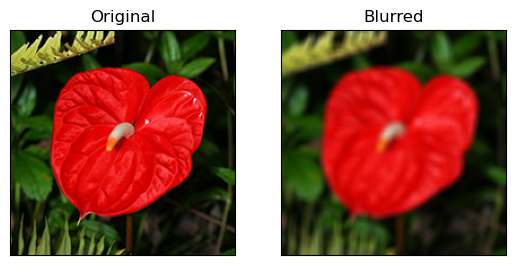

In [3]:
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur1),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

The same effect can be achieved using [`cv2.boxFilter()`](http://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gad533230ebf2d42509547d514f7d3fbc3). Try it.

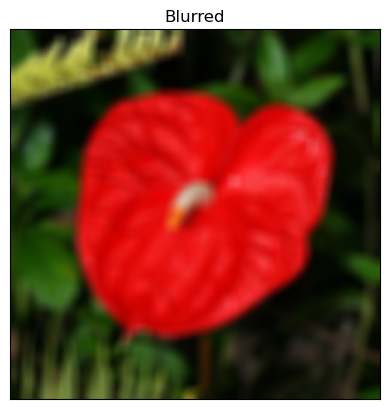

In [4]:
blur0 = cv2.boxFilter(img,-1,(7,7))
plt.imshow(blur0),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
blur2 = cv2.GaussianBlur(img,(7,7),0)

Smoothing with Gaussian filter can be performed using the function, [`cv2.GaussianBlur()`](http://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1). We should specify the `width` and `height` of kernel, which should be positive and odd. We also should specify the standard deviation in X and Y direction, `sigmaX` and `sigmaY` respectively. If only `sigmaX` is specified, `sigmaY` is taken as same as `sigmaX`. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is a highly effective method for removing gaussian noise from the image. To obtain the Gaussian kernel, you can use the function [`cv2.GaussianKernel()`](http://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa).

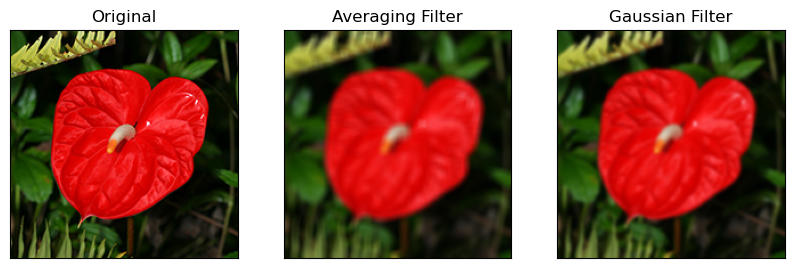

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur1),plt.title('Averaging Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur2),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

The median filter is a non-linear filter that takes the median of all pixels under the kernel neighborhood and replaces the central element with this median value. In most filtering procedures, the central element is a newly calculated value which may be a new pixel value. But in median blurring, the central element is always replaced by some pixel value in the image within the defined neighborhood. This reduces the noise effectively, particularly salt-and-pepper noise. Its kernel size should be a positive odd integer.

In [7]:
blur3 = cv2.medianBlur(img,7)

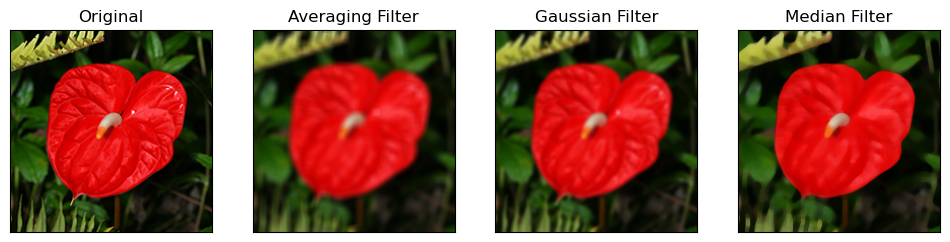

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(blur1),plt.title('Averaging Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(blur2),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(blur3),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

What can you observe from the outcome of all three smoothing filters (all have same kernel size of 5x5)?

**Q1**: You are given two noise-ridden images of Lena. Use appropriate filters (with appropriate kernel size and parameters) to remove the noise as best as you could.

(([], []), ([], []))

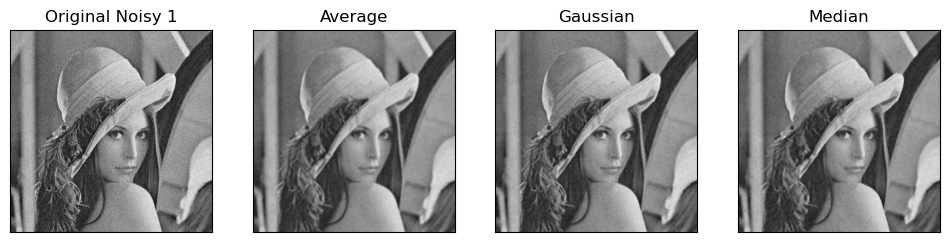

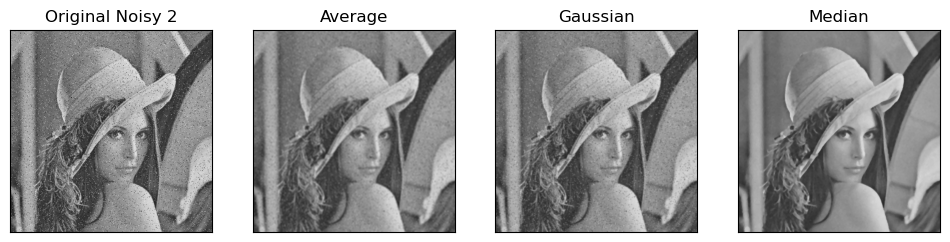

In [9]:
lena_noisy1 = cv2.imread('lena_gaussianNoise.png')
lena_noisy2 = cv2.imread('lena_spNoise.png')

# Add your code here
blurnoisy1 = cv2.blur(lena_noisy1,(5,5))
blurnoisy2 = cv2.GaussianBlur(lena_noisy1,(5,5),0)
blurnoisy3 = cv2.medianBlur(lena_noisy1,5) 

blurnoisy4 = cv2.blur(lena_noisy2,(5,5))
blurnoisy5 = cv2.GaussianBlur(lena_noisy2,(5,5),0)
blurnoisy6 = cv2.medianBlur(lena_noisy2,5) 

plt.figure(figsize=(12,6))
plt.subplot(141),plt.imshow(lena_noisy1 ),plt.title('Original Noisy 1')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(blurnoisy1),plt.title('Average')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(blurnoisy2),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(blurnoisy3),plt.title('Median')
plt.xticks([]), plt.yticks([])


plt.figure(figsize=(12,6))
plt.subplot(141),plt.imshow(lena_noisy2),plt.title('Original Noisy 2')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(blurnoisy4),plt.title('Average')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(blurnoisy5),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(blurnoisy6),plt.title('Median')
plt.xticks([]), plt.yticks([])


### Defining Kernels

What if we wish to define our own filters? OpenCV provides a function [`cv2.filter2D()`](http://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) to convolve a kernel with an image. So, all we need to do is to define the filter in array form. 

Let's try to manually create a 5x5 averaging filter kernel (which is similar to that done earlier), 
$$H = \frac{1}{25}\begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}$$
and then convolve it with an image to perform filtering.

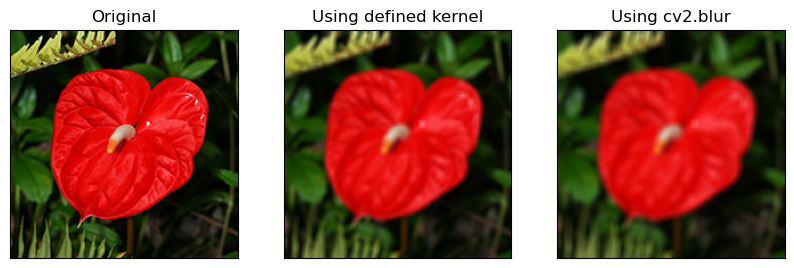

In [10]:
kernel = np.ones((5,5),np.float32)/25

filtered = cv2.filter2D(img,-1,kernel) # find out from doc what these parameters mean...also, there are other parameters not used

plt.figure(figsize=(10,5))
plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(filtered), plt.title('Using defined kernel')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(blur1), plt.title('Using cv2.blur')
plt.xticks([]), plt.yticks([])
plt.show()

**Q2**: How about trying out these other kernels?
$$H_1 = \frac{1}{16}\begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix}$$
$$H_2 = \frac{1}{25}\begin{bmatrix} 0 & 0 & 1 & 0 & 0 \\ 0 & 2 & 2 & 2 & 0 \\ 1 & 2 & 5 & 2 & 1 \\ 0 & 2 & 2 & 2 & 0 \\ 0 & 0 & 1 & 0 & 0 \end{bmatrix}$$

Explore other kernels and see how it affect the output.

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
[[0.   0.   0.04 0.   0.  ]
 [0.   0.08 0.08 0.08 0.  ]
 [0.04 0.08 0.2  0.08 0.04]
 [0.   0.08 0.08 0.08 0.  ]
 [0.   0.   0.04 0.   0.  ]]


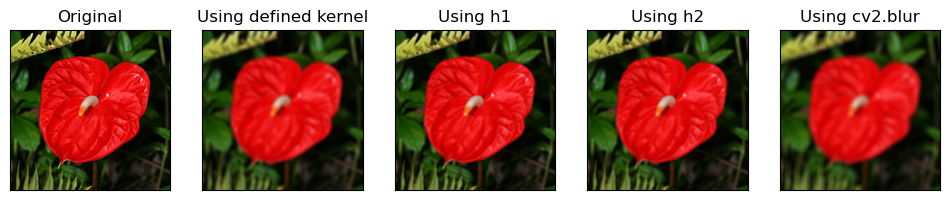

In [11]:
h1 = np.array([[1,2,1],[2,4,2],[1,2,1]],np.float32)/16
#row1=np.array([0,0,1,0,0],np.float32)
#row2=np.array([0,2,2,2,0],np.float32)
h2 = np.array([[0,0,1,0,0],[0,2,2,2,0],[1,2,5,2,1],[0,2,2,2,0],[0,0,1,0,0]],np.float32)/25
print(h1)
print(h2)

filteredh1 = cv2.filter2D(img,-1,h1) # find out from doc what these parameters mean...also, there are other parameters not used
filteredh2 = cv2.filter2D(img,-1,h2)

plt.figure(figsize=(12,6))
plt.subplot(151), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(152), plt.imshow(filtered), plt.title('Using defined kernel')
plt.xticks([]), plt.yticks([])
plt.subplot(153), plt.imshow(filteredh1), plt.title('Using h1')
plt.xticks([]), plt.yticks([])
plt.subplot(154), plt.imshow(filteredh2), plt.title('Using h2')
plt.xticks([]), plt.yticks([])
plt.subplot(155), plt.imshow(blur1), plt.title('Using cv2.blur')
plt.xticks([]), plt.yticks([])
plt.show()

## Image Sharpening

Sharpening is the opposite process of smoothing, where the details of an image are accentuated to produce a sharpened image. This process can be accomplished by first obtaining the "details" of an image, by subtracting a smoothened image from the original image. Then, these "details" can be added back to the original image to produce the sharpened output image. 

Let's first generate a blur version of the `lena.jpg` image, and we shall attempt to sharpen it.

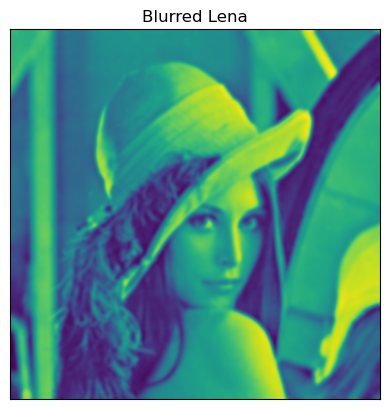

In [12]:
lena = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
blurlena = cv2.GaussianBlur(lena,(13,13),0)   # let's make it blurrer than usual
plt.imshow(blurlena),plt.title('Blurred Lena')
plt.xticks([]), plt.yticks([])
plt.show()

Next, we shall perform sharpening.

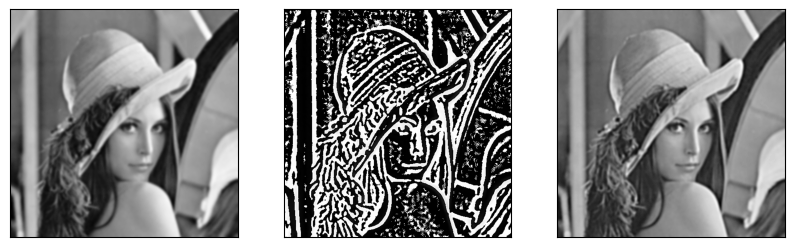

In [13]:
sm = cv2.blur(blurlena,(11,11))
details = blurlena - sm;
shp = blurlena + details;

plt.figure(figsize=(10,5))
plt.subplot(131), plt.imshow(blurlena, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(details, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(shp, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

**Q3**: Try sharpening the `redflower` image (which is a colour image). What can you observe?

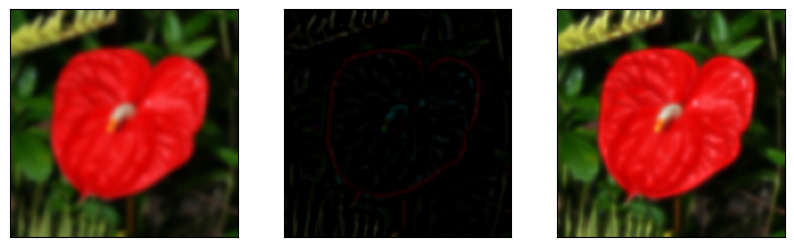

In [21]:
gblur1 = cv2.GaussianBlur(img,(13,13),0)
gblur2 = cv2.blur(img,(11,11))
details = cv2.subtract(gblur1,gblur2)
shp = cv2.add(gblur1,details)

plt.figure(figsize=(10,5))
plt.subplot(131), plt.imshow(gblur1, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(details, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(shp, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

### Padding before Filtering

Explore [`numpy.pad`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html) function to try out different padding styles which can have a varying degree of effect on the image border after filtering.

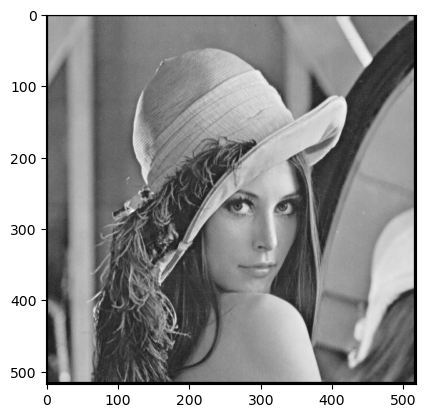

In [22]:
lenapadded = np.pad(lena, (3,3), 'constant', constant_values=0)   # pad with zeros
plt.imshow(lenapadded, cmap='gray')
plt.show()

**Q4**: Do the earlier operations using `cv2.blur`, `cv2.filter2D`, etc. perform any padding during filtering? Investigate this.

## II. Gradients / Edges
This section has two parts, The first introduces image gradients and how they are used for edge detection, and also more well known edge detectors like Canny. Secondly, we take a look at how binary images can be processed to extract information valuable for further interpretation. The concept of connected components is a crucial one to understand how segmented regions can be labeled and counted. 

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Let's read the `redflower.jpg` image we have previously used. Gradients are the intensity changes in an image that can constitute edges. Typically, gradients can be computed directly from grayscale images instead of colour images, as information of these intensity changes are still inherent after conversion. 


[[ 1 -1]]
[[ 1]
 [-1]]


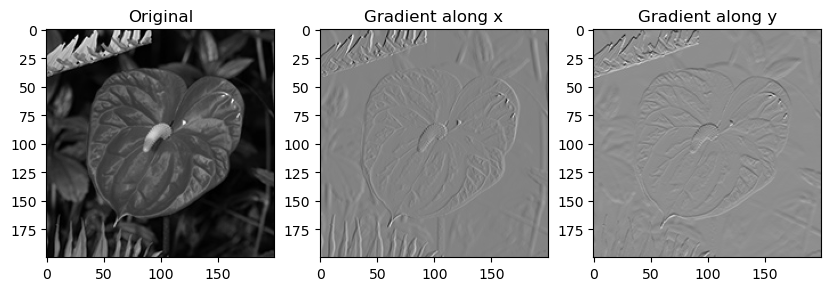

In [24]:
img = cv2.imread('redflower.jpg', cv2.IMREAD_GRAYSCALE) 
kernel_y = np.array([[1],[-1]])
kernel_x = np.transpose(kernel_y)
print(kernel_x), print(kernel_y)
gradient_x = cv2.filter2D(img, cv2.CV_32F, kernel_x)    # CV_32F sets the filtered values to 32-bit floats.
gradient_y = cv2.filter2D(img, cv2.CV_32F, kernel_y)

plt.figure(figsize=(10,5))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(gradient_x, cmap='gray'), plt.title('Gradient along x')
plt.subplot(133), plt.imshow(gradient_y, cmap='gray'), plt.title('Gradient along y')
plt.show()

You will notice vertical-like edges appearing when we filter with kernel $\begin{bmatrix} 1 & -1 \end{bmatrix}$ while horizontal-like edges appear when we filter with kernel $\begin{bmatrix} 1 \\ -1 \end{bmatrix}$. 

Yes, this is correct. Try to make sense of why these kernels result in these type of edges (vertical/horizontal). 

Let's compute the magnitude of these gradient values. There are two ways of calculating (assuming $G_x$ denote gradient along $x$ while $G_y$ denote gradient along $y$:
1. The "correct" way: $\sqrt{{G_x}^2 + {G_y}^2}$
2. The "fast" way: $\mid{G_x}\mid + \mid{G_y}\mid$

Observe if there's any difference in the two gradient magnitude images.  

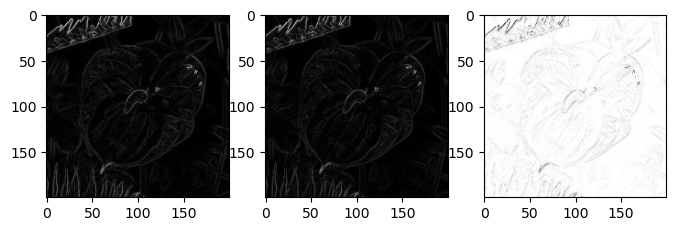

In [26]:
mag1 = np.sqrt((gradient_x ** 2) + (gradient_y ** 2))
mag2 = np.abs(gradient_x) + np.abs(gradient_y)
test = cv2.subtract(mag1,mag2)

plt.figure(figsize=(8,4))
plt.subplot(131), plt.imshow(mag1, cmap='gray')
plt.subplot(132), plt.imshow(mag2, cmap='gray')
plt.subplot(133), plt.imshow(test, cmap='gray')
plt.show()

Let's compute the orientation of these gradient values:

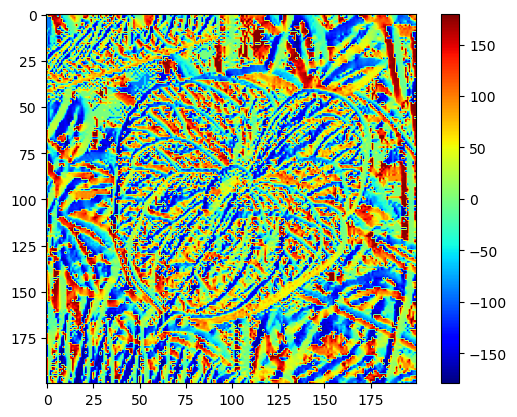

In [27]:
import math
direction = np.arctan2(gradient_y,gradient_x)    # add eps to prevent division by zero
direction_angle = np.rad2deg(direction)
fig = plt.imshow(direction_angle, cmap='jet')
cbar = plt.colorbar(fig)     # creates a colorbar
plt.show()

OpenCV provides three types of gradient filters: Sobel, Scharr and Laplacian. We will try the Laplacian and Sobel filters.



### Sobel filters

Sobel operators essentially consists of a joint Gausssian smoothing plus differentiation operation, so it is more resistant towards noise. You can specify the direction of derivatives to be taken, vertical or horizontal. You can also specify the size of kernel by the argument `ksize`.


In [28]:
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=1)
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=1)

sobelxy = cv2.Sobel(img,cv2.CV_8U,1,1,ksize=1)

### Laplacian (2nd order gradient) filters

It calculates the Laplacian of the image given by the relation, $\Delta=\frac{\delta^2 f}{\delta x^2}+\frac{\delta^2 f}{\delta y^2}$ where each derivative is found using Sobel derivatives. If ksize = 1, then following kernel is used for filtering:
$\begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}$



In [ ]:
laplacian = cv2.Laplacian(img,cv2.CV_8U)

Let's show them all in a single plot:

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelxy,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([]) 
plt.show()

**Q5**: What do you observe from the edges of the Sobel edge detector and the Laplacian edge detector?

Here:

Previously, the output datatype used is `cv2.CV_8U` or `np.uint8`. But there is a slight problem with that. Black-to-White transition is taken as positive slope (it has a positive value) while White-to-Black transition is taken as a negative slope (it has negative value). So when `np.uint8` is used, all negative slopes are clipped to zero. In simple words, those edges are missed.

If you want to detect both edges, better option is to keep the output datatype to some signed integer or floats, like `cv2.CV_16S`, `cv2.CV_64F` etc., take its absolute value and then convert back to `cv2.CV_8U`.

In [ ]:
shape_img = cv2.imread('monitor.jpg',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(shape_img,cv2.CV_8U,1,0,ksize=1)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(shape_img,cv2.CV_64F,1,0,ksize=1)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(shape_img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2), plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3), plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

### Canny edge detector

OpenCV has the famous Canny edge detector built-in as a single function, [`cv2.Canny()`](http://docs.opencv.org/3.1.0/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de). 

**`void cv::Canny  (   InputArray 	image,
                    OutputArray 	edges,
                    double 	threshold1,
                    double 	threshold2,
                    int 	apertureSize = 3,
                    bool 	L2gradient = false 
                )	`**

We will see how to use it. First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default this value is 3. Last argument is `L2gradient` which specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses the faster version: $G=|G_x|+|G_y|$. By default, it is False.

In [ ]:
flower_edges = cv2.Canny(img,100,200)
monitor_edges = cv2.Canny(shape_img,100,200)

plt.figure(figsize=(6,6))
plt.subplot(221),plt.imshow(shape_img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(monitor_edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(flower_edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Additional Exercises

**Q1. Alpha-trimmed mean filter**. Implement a function to perform this. You can test it using the blurred Lena image we used earlier.

Hint: We need two loops to slide the window (corresponding to the kernel neighborhood) across the entire image


In [ ]:
def alphaTrimmedMean(im,alpha,n=5):
    # im: input image
    # alpha: alpha coefficient (between 0 and 1) defining the proportion of elements to be trimmed
    # n: default kernel size (default value 5)
    
    
    k = int((n-1)/2)   # half a kernel window. This value will be useful!
    
    # COMPLETE THE REST OF THE FUNCTION -----------------------------------------------------------
    # pad with k pixels on all sides
  
    
    # create output image filled with zeros (preparation)

    
    # calculate the amount of trim, b --> the number of elements to trim from each end
    
    
    # process the image, pixel by pixel
    for i in range(k,im.shape[0]):
        for j in range(k,im.shape[1]):
            
            # extract the window area
            block = im[max(i-k,0):min(i+k,im.shape[0]), max(j-k,0):min(j+k,im.shape[1])]

            # reshape the neighborhood into a vector by flattening the 2D block
            wB = block.flatten()
            
            # sort the neighborhood vector in ascending order

            
            # trim b elements from each end of the vector
  
    
            # calculate mean of the trimmed vector


            # assign the calculated mean value to the central pixel location

    return img

alpha = 0.1
enh_lena = alphaTrimmedMean(blurlena, alpha)
plt.xticks([]), plt.yticks([])
plt.imshow(enh_lena, cmap='gray'), plt.title('Alpha = %.2f'%alpha), plt.show()

**Q2. Bilateral Filtering**

OpenCV has a function for Bilateral Filtering called [`cv2.bilateralFilter()`](https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed) 

Try it out on the `cat.png` image.

<img src="cat.png">

In [ ]:
pan = cv2.imread('cat.png')
pan = cv2.blur(pan,(5,5))
# add code


